In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
#from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [144]:
london_crimes = pd.read_csv(r"C:\Users\SyedImam\OneDrive - Accelerate People\Documents\Synaptic project\DA_Project_C_Resources\Monthly_Crime_Statistics_2008_2018.csv")
london_crimes.head(5)

,Borough,Major Category,Minor Category,200801,200802,200803,200804,200805,200806,200807,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
0,Barking and Dagenham,Burglary,Burglary in a Dwelling,82,71,87,74,74,103,113,...,122,75,93,77,94,84,99,94,106,163
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,59,68,56,53,57,39,44,...,61,65,39,52,40,36,50,61,60,50
2,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,79,52,55,73,63,80,73,...,30,29,32,29,21,29,23,35,21,15
3,Barking and Dagenham,Criminal Damage,Criminal Damage To Motor Vehicle,142,138,118,158,126,96,116,...,53,64,64,67,69,42,38,42,47,33
4,Barking and Dagenham,Criminal Damage,Criminal Damage To Other Building,20,19,20,23,16,12,17,...,6,9,8,8,7,7,11,5,4,7


In [145]:
np.shape(london_crimes)

(1056, 135)

In [146]:
london_crimes.columns = [c.lower().replace(' ', '_') for c in london_crimes.columns]
london_crimes.head(5)

,borough,major_category,minor_category,200801,200802,200803,200804,200805,200806,200807,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
0,Barking and Dagenham,Burglary,Burglary in a Dwelling,82,71,87,74,74,103,113,...,122,75,93,77,94,84,99,94,106,163
1,Barking and Dagenham,Burglary,Burglary in Other Buildings,59,68,56,53,57,39,44,...,61,65,39,52,40,36,50,61,60,50
2,Barking and Dagenham,Criminal Damage,Criminal Damage To Dwelling,79,52,55,73,63,80,73,...,30,29,32,29,21,29,23,35,21,15
3,Barking and Dagenham,Criminal Damage,Criminal Damage To Motor Vehicle,142,138,118,158,126,96,116,...,53,64,64,67,69,42,38,42,47,33
4,Barking and Dagenham,Criminal Damage,Criminal Damage To Other Building,20,19,20,23,16,12,17,...,6,9,8,8,7,7,11,5,4,7


In [147]:
# Use GroupBy() to compute the sum
london_crimes = london_crimes.groupby('major_category').sum()
london_crimes.head(5)

,200801,200802,200803,200804,200805,200806,200807,200808,200809,200810,...,201803,201804,201805,201806,201807,201808,201809,201810,201811,201812
major_category,,,,,,,,,,,,,,,,,,,,,
Burglary,8839,7661,7891,7218,7285,7395,7402,7570,6964,7593,...,7638,7626,7549,7284,7436,7795,7346,8483,9187,8479
Criminal Damage,8590,8192,8349,8628,8797,8491,8351,7950,7815,7961,...,4749,4939,5164,5006,5224,4737,4638,5005,4888,4829
Drugs,5947,6854,6548,5815,6659,6161,6978,6690,6519,7108,...,2803,2981,3048,2686,2607,3315,2951,3061,3208,3096
Fraud or Forgery,2874,2860,2869,3323,2949,3341,3752,3325,3368,3517,...,107,115,118,96,102,96,106,79,115,97
Other Notifiable Offences,892,860,925,881,887,1050,1000,939,977,948,...,1525,1386,1577,1471,1810,1419,1428,1561,1403,1310


In [148]:
london_crimes =london_crimes.transpose()

In [149]:
london_crimes.head(5)

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
200801,8839,8590,5947,2874,892,3157,745,26692,13828
200802,7661,8192,6854,2860,860,2723,711,25493,13208
200803,7891,8349,6548,2869,925,2878,788,26283,14408
200804,7218,8628,5815,3323,881,2844,724,26271,13690
200805,7285,8797,6659,2949,887,2775,786,26311,15900


In [150]:
london_crimes =london_crimes.sum(axis=1)

In [151]:
london_crimes= pd.DataFrame(london_crimes)

In [152]:
london_crimes

,0
200801,71564
200802,68562
200803,70939
200804,69394
200805,72349
...,...
201808,69171
201809,68759
201810,73981
201811,74249


In [153]:
london_crimes.index = pd.to_datetime(london_crimes.index, format = '%Y%m')

In [154]:
london_crimes.columns =['total_crimes_committed']

In [155]:
london_crimes

,total_crimes_committed
2008-01-01,71564
2008-02-01,68562
2008-03-01,70939
2008-04-01,69394
2008-05-01,72349
...,...
2018-08-01,69171
2018-09-01,68759
2018-10-01,73981
2018-11-01,74249


In [156]:
london_crimes = london_crimes.rename_axis('Months')

In [157]:
london_crimes

,total_crimes_committed
Months,
2008-01-01,71564
2008-02-01,68562
2008-03-01,70939
2008-04-01,69394
2008-05-01,72349
...,...
2018-08-01,69171
2018-09-01,68759
2018-10-01,73981


In [158]:
##checking for empty values in a column
london_crimes['total_crimes_committed'].isnull().values.any()

False

In [159]:
## count for NaN in df 
london_crimes['total_crimes_committed'].isnull().sum()

0

In [160]:
## checking for NaN in entire df
london_crimes.isnull().values.any()

False

In [161]:
np.shape(london_crimes)

(132, 1)

In [162]:
## output df to csv
london_crimes.to_csv(r"C:\Users\SyedImam\OneDrive - Accelerate People\Documents\Synaptic project"+" london_crimes.csv",index= True)

In [163]:
london_crimes.describe()

,total_crimes_committed
count,132.000000
mean,65659.621212
std,5355.314376
min,52676.000000
25%,61484.750000
50%,66211.000000
75%,70335.250000
max,74821.000000


<AxesSubplot:xlabel='Months'>

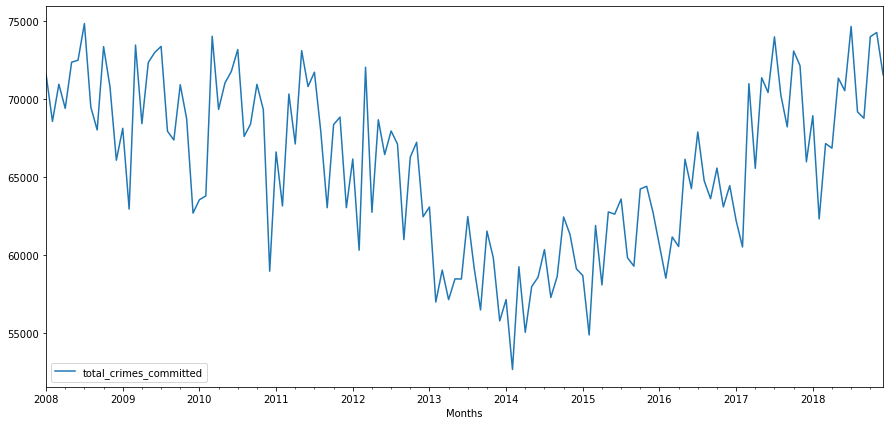

In [164]:
## plotting line chart to see how it looks
from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
london_crimes.plot()

In [165]:
## Identify with ADF test stationary Null Hypo: Not Stationary Alt Hpo:Stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(london_crimes['total_crimes_committed'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.791146
p-value: 0.821709
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580


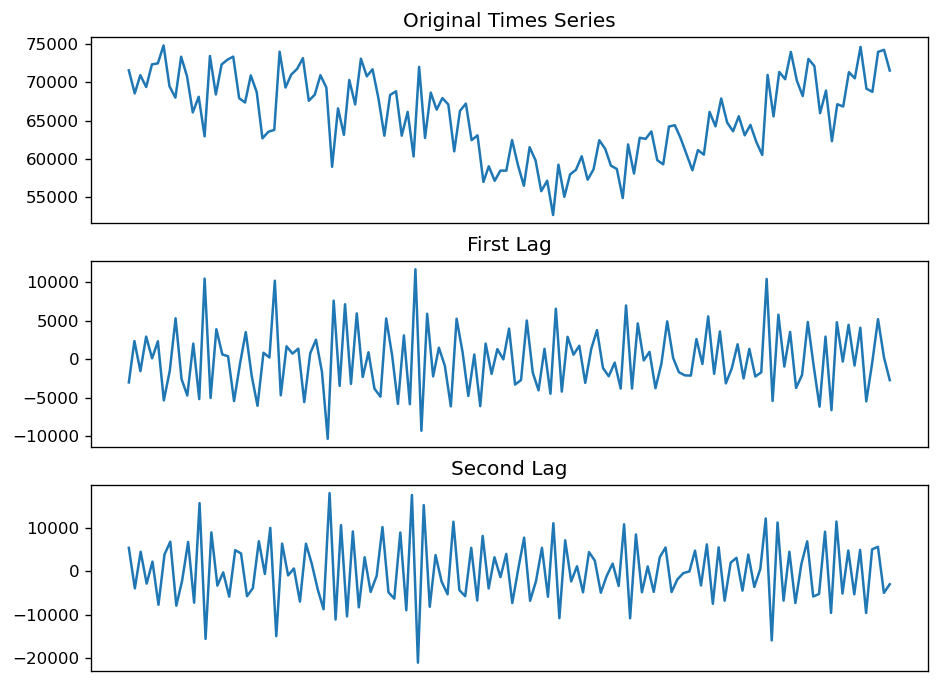

In [166]:
##finding D difference/lags value 

plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
 
# Original
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(london_crimes.total_crimes_committed); ax1.set_title('Original Times Series'); ax1.axes.xaxis.set_visible(False)
# 1st lag
ax2.plot(london_crimes.total_crimes_committed.diff()); ax2.set_title('First Lag'); ax2.axes.xaxis.set_visible(False)
# 2nd lag
ax3.plot(london_crimes.total_crimes_committed.diff().diff()); ax3.set_title('Second Lag'); ax3.axes.xaxis.set_visible(False)
plt.show()

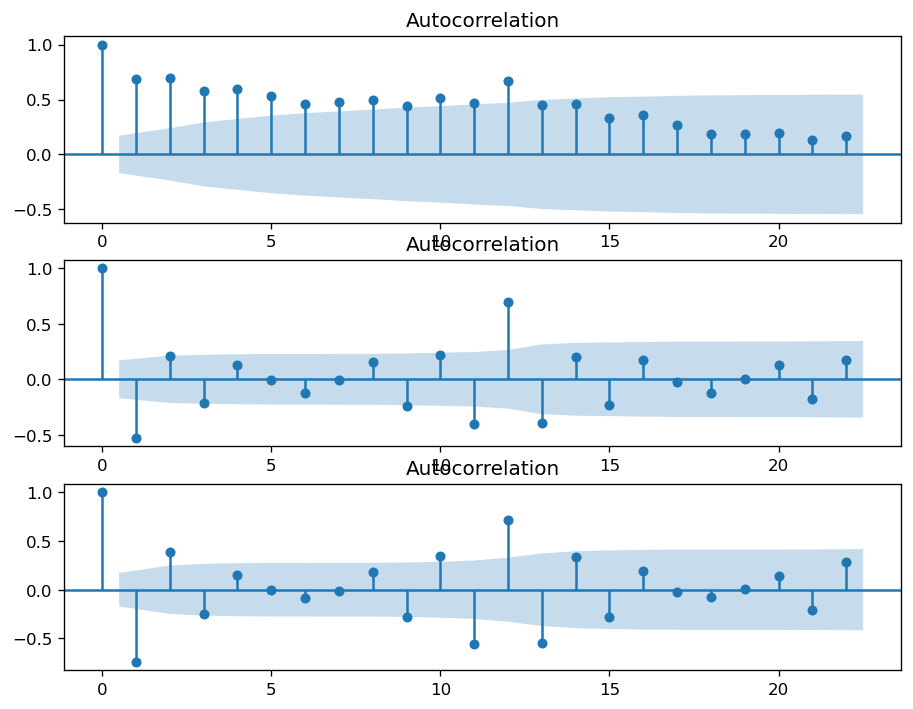

In [167]:
## Verify 1st lag by using Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(london_crimes.total_crimes_committed, ax=ax1)
plot_acf(london_crimes.total_crimes_committed.diff().dropna(), ax=ax2)
plot_acf(london_crimes.total_crimes_committed.diff().diff().dropna(), ax=ax3)
plt.show()

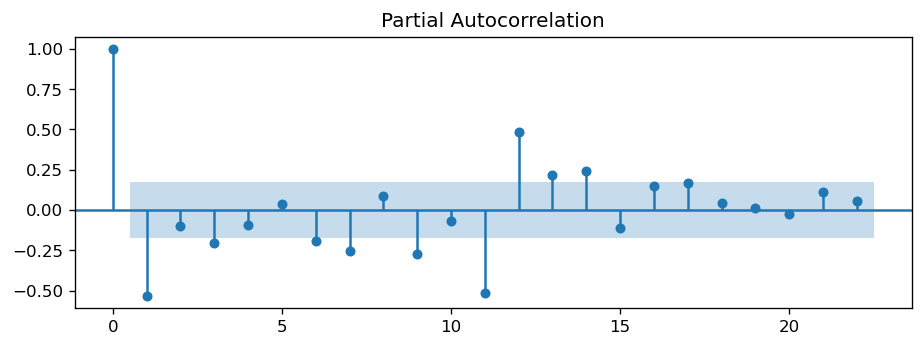

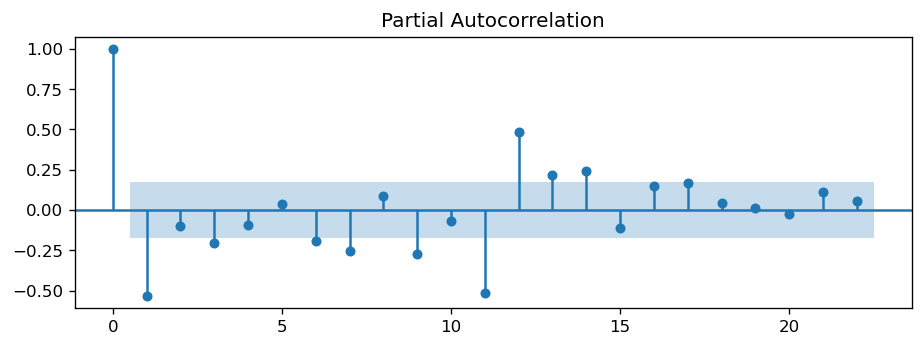

In [168]:
## finding P value using partial autocorrelation function

rcParams['figure.figsize'] = 9, 3

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(london_crimes.total_crimes_committed.diff().dropna())

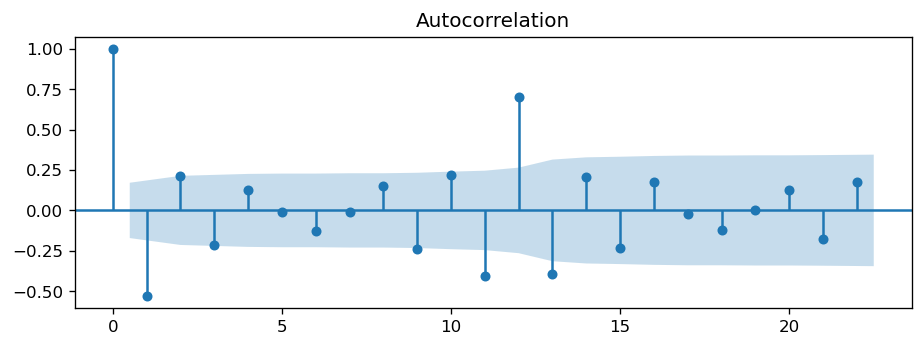

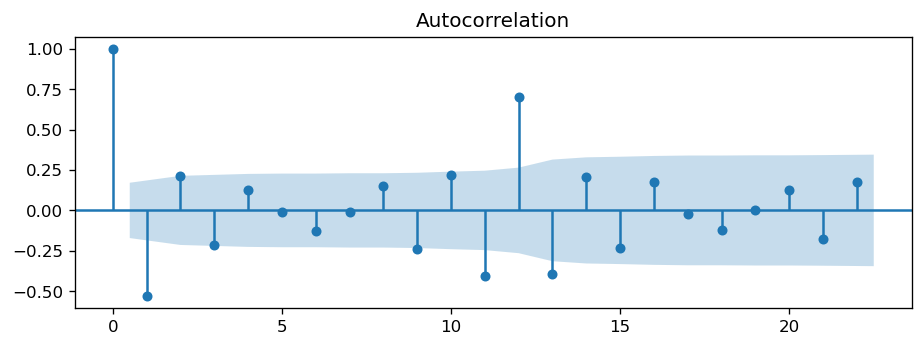

In [169]:
## finding Q value using acf
plot_acf(london_crimes.total_crimes_committed.diff().dropna())

In [170]:
## Implementing Arima Model

from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(london_crimes.total_crimes_committed, order = (1,1,1))
model_fit = model.fit(disp=0)
model_fit.summary()

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                                ARIMA Model Results                                 
====================================================================================
Dep. Variable:     D.total_crimes_committed   No. Observations:                  131
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -1253.780
Method:                             css-mle   S.D. of innovations           3462.056
Date:                      Fri, 04 Aug 2023   AIC                           2515.561
Time:                              10:58:15   BIC                           2527.062
Sample:                          02-01-2008   HQIC                          2520.234
                               - 12-01-2018                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             10.1264    100.222      0.101      0.920    -186.304     206.557
ar.L1.D.total_crimes_committed     0.0154      0.194      0.079      0.937      -0.366       0.396
ma.L1.D.total_crimes_committed    -0.6796      0.173     -3.927      0.000      -1.019      -0.340
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           65.0935           +0.0000j           65.0935            0.0000
MA.1            1.4714           +0.0000j            1.4714            0.0000
-----------------------------------------------------------------------------
"""

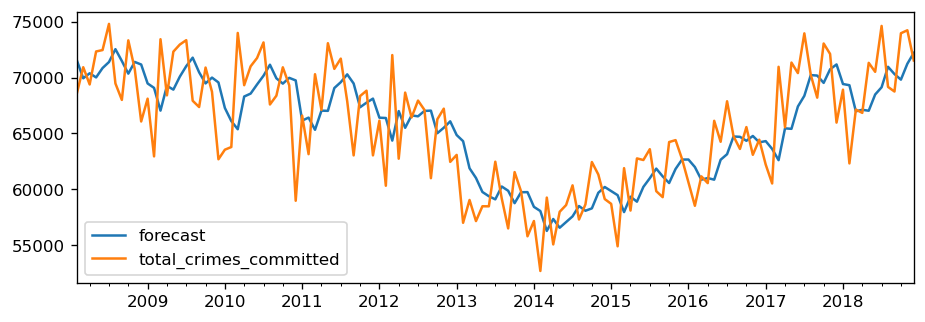

In [171]:
## prediction from model

model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:xlabel='Months'>

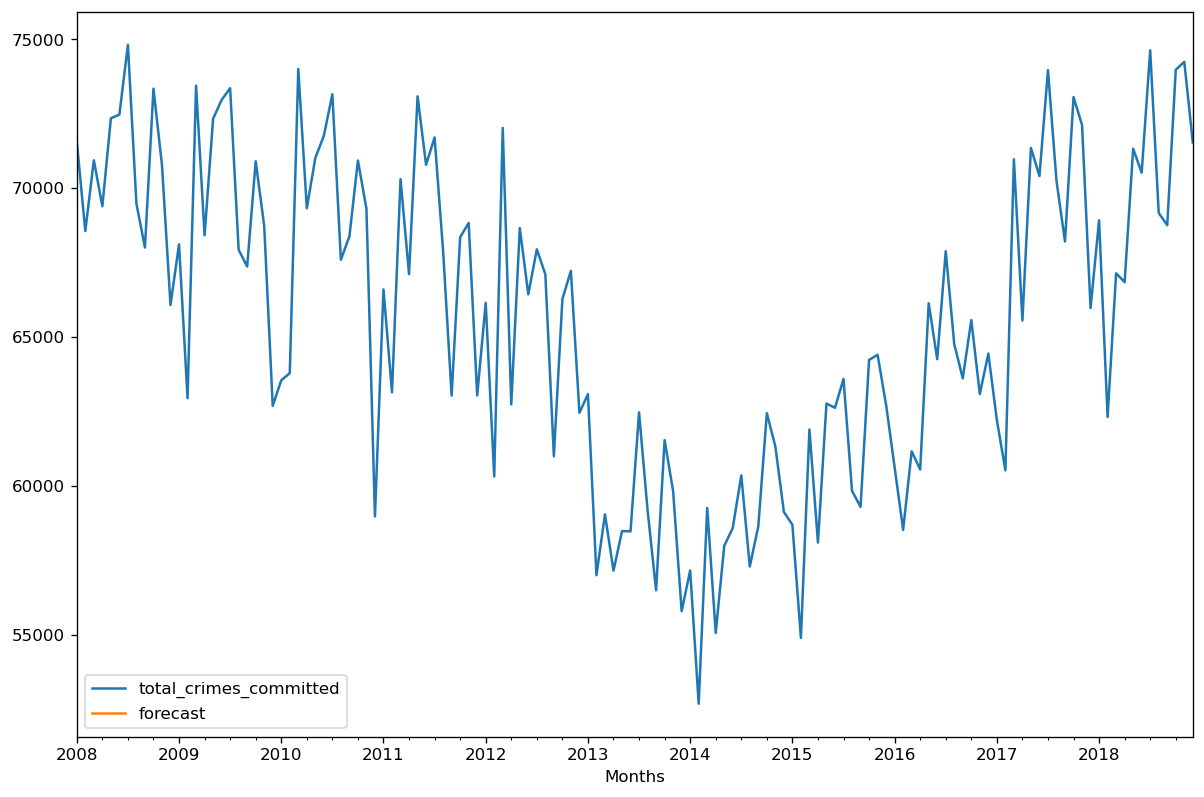

In [172]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(london_crimes['total_crimes_committed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
london_crimes['forecast']= results.predict(start=137,end=145,dynamic=True)
london_crimes[['total_crimes_committed','forecast']].plot(figsize=(12,8))

## ARIMA and SARIMA

In [173]:
## ARIMA and SARIMA Model

test1=ARIMA(london_crimes['total_crimes_committed'], order=(1,1,1))
arima_results=test1.fit()
test2=SARIMAX(london_crimes['total_crimes_committed'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_results=test2.fit()

# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=12)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=12)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed

plt.plot(sarima_mean, label='SARIMA')
plt.plot(arima_mean, label='ARIMA')
plt.plot(london_crimes['total_crimes_committed'], label='observed')
plt.legend()
plt.show()

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency

AttributeError: 'ARIMAResults' object has no attribute 'get_forecast'

## AIC BIC

In [174]:
##using AIC and BIC to guess P and Q values

aic_bic=[]

for p in range(3):
    for q in range(3):
        try:
            model=ARIMA(london_crimes['total_crimes_committed'], order=(p,0,q))
            results=model.fit()
            print(p,q,results.aic,results.bic)
        except:
            print(p,q,None,None)
            
        aic_bic.append((p,q,results.aic,results.bic))

order_df=pd.DataFrame(aic_bic, columns=["p","q","AIC","BIC"])
print(order_df)

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


0 0 2644.258963337333 2650.024567182506
0 1 2606.1901133957354 2614.8385191634943
0 2 2565.527821915126 2577.0590296054716
1 0 2559.8953859878493 2568.5437917556083
1 1 2533.086320372467 2544.6175280628127
1 2 2534.8938994226737 2549.3079090356055


C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Future

2 0 2532.926027801342 2544.4572354916877
2 1 2534.117527840665 2548.5315374535967


C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        Future

2 2 None None
   p  q          AIC          BIC
0  0  0  2644.258963  2650.024567
1  0  1  2606.190113  2614.838519
2  0  2  2565.527822  2577.059030
3  1  0  2559.895386  2568.543792
4  1  1  2533.086320  2544.617528
5  1  2  2534.893899  2549.307909
6  2  0  2532.926028  2544.457235
7  2  1  2534.117528  2548.531537
8  2  2  2534.117528  2548.531537


C:\Users\SyedImam\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:410: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
C:\Users\SyedImam\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:496: RuntimeWarning: invalid value encountered in double_scalars
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.


## Holt Winter Method

In [175]:
## import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing


<AxesSubplot:title={'center':'Crimes Rate over the Year'}, xlabel='Months'>

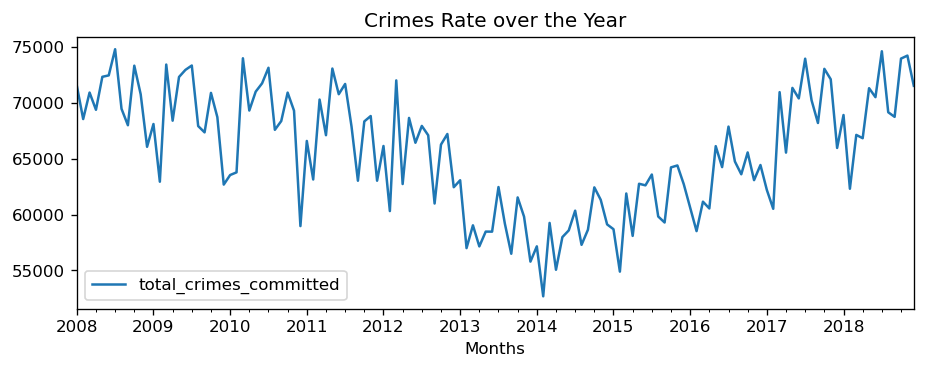

In [176]:
london_crimes[['total_crimes_committed']].plot(title='Crimes Rate over the Year')

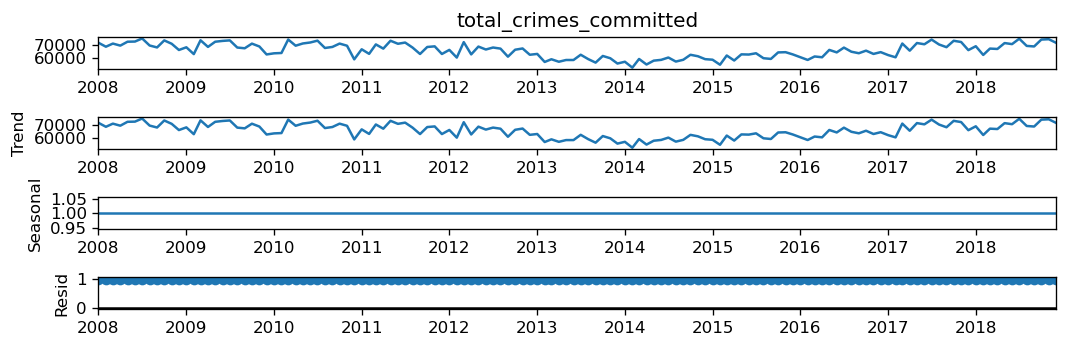

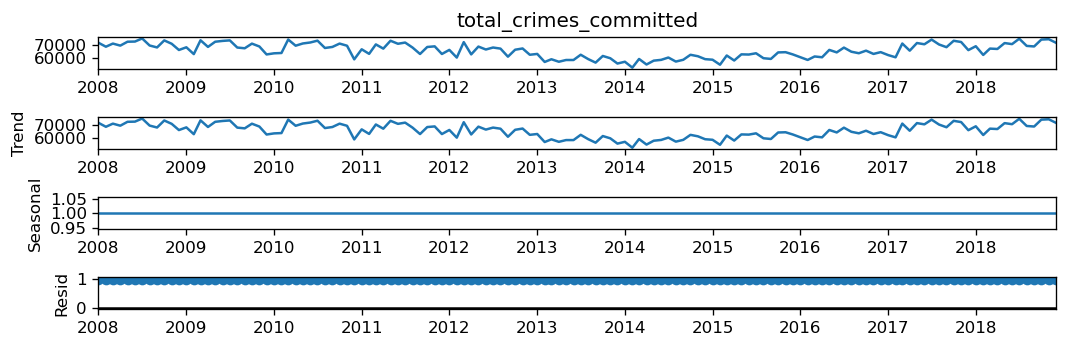

In [177]:
# Decompose the data frame to get the trend, seasonality and noise
decompose_result = seasonal_decompose(london_crimes['total_crimes_committed'],model='multiplicative',period=1)
decompose_result.plot()

In [184]:
# Set the value of Alpha and define x as the time period
x = 12
alpha = 1/(2*x)

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing grpah'}, xlabel='Months'>

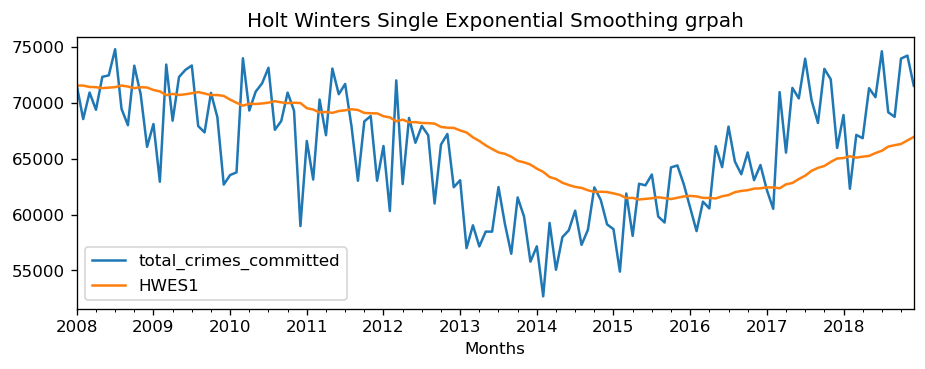

In [185]:
# Single exponential smoothing of the visitors data set
london_crimes['HWES1'] = SimpleExpSmoothing(london_crimes['total_crimes_committed']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues      
london_crimes[['total_crimes_committed','HWES1']].plot(title='Holt Winters Single Exponential Smoothing grpah')

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot:title={'center':'Additive and Multiplicative Trend'}, xlabel='Months'>

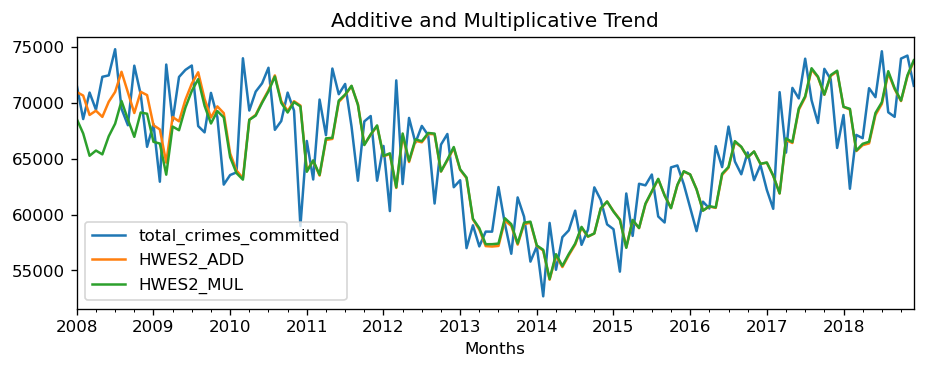

In [186]:
# Double exponential smoothing of visitors data set ( Additive and multiplicative)
london_crimes['HWES2_ADD'] = ExponentialSmoothing(london_crimes['total_crimes_committed'],trend='add').fit().fittedvalues
london_crimes['HWES2_MUL'] = ExponentialSmoothing(london_crimes['total_crimes_committed'],trend='mul').fit().fittedvalues
london_crimes[['total_crimes_committed','HWES2_ADD','HWES2_MUL']].plot(title='Additive and Multiplicative Trend')

C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\SyedImam\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Text(0.5, 1.0, 'Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

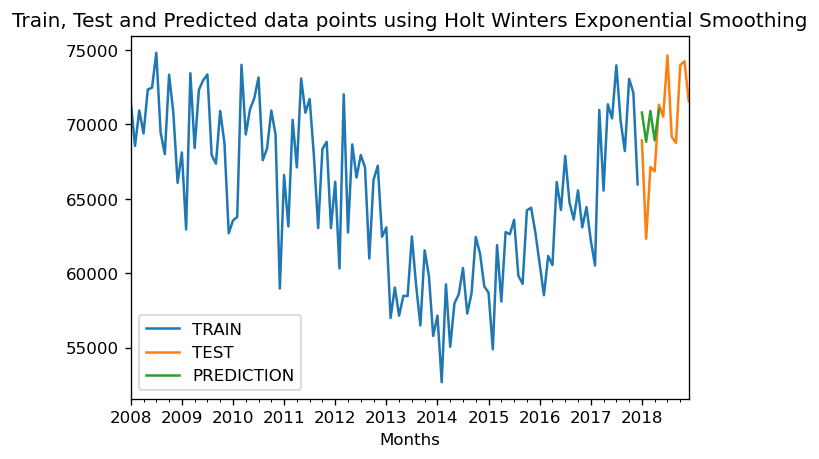

In [181]:
# Split into train and test set
train_london_crimes = london_crimes[:120]
test_london_crimes = london_crimes[120:]

# Fit the model
fitted_model = ExponentialSmoothing(train_london_crimes['total_crimes_committed'],trend='mul',seasonal='mul',seasonal_periods=2).fit()
test_predictions = fitted_model.forecast(5)
train_london_crimes['total_crimes_committed'].plot(legend=True,label='TRAIN')
test_london_crimes['total_crimes_committed'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted data points using Holt Winters Exponential Smoothing')

<AxesSubplot:xlabel='Months'>

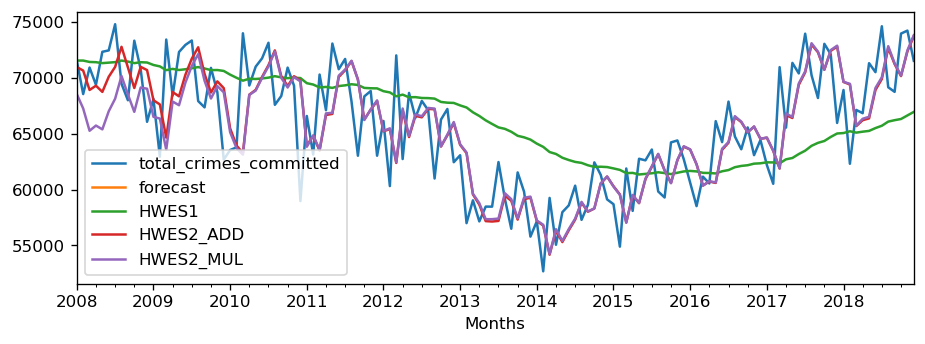

In [187]:
london_crimes.plot()

In [190]:
london_crimes.columns

Index(['total_crimes_committed', 'forecast', 'HWES1', 'HWES2_ADD',
       'HWES2_MUL'],
      dtype='object')

In [189]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [191]:
MAE = mean_absolute_error(
    y_true=london_crimes['total_crimes_committed'], # actual values
    y_pred=london_crimes['forecast'] # predicted values
)
MAE.round(2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
MSE = mean_squared_error(
    y_true=london_crimes['total_crimes_committed'], # actual values
    y_pred=london_crimes['forecast'] # predicted values
)
MSE.round(2)

In [ ]:
RMSE = MSE**(1/2)
RMSE.round(2)

### Regression accuracy metrics

   The MSE, MAE, RMSE, and R-Squared are mainly used metrics to evaluate the prediction error rates and model performance in regression analysis.
   
MAE::(Mean absolute error) represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

MSE:: (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

RMSE:: (Root Mean Squared Error) is the error rate by the square root of MSE.

R-squared (Coefficient of determination):: represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

# Junk

In [ ]:
london_crimes['2008'] = london_crimes.iloc[:,1:12].sum(axis=1)
london_crimes.head(5)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import pytz

# Instantiate the model
model = ARIMA(london_crimes['total_crimes_committed'], order=(1,1,1))

# Fit the model
results = model.fit()

# Generate predictions
forecast=results.get_prediction(start=101, end=112)

# Extract prediction mean
mean_forecast = forecast.predicted_mean

# Get confidence intervals of  predictions
confidence_intervals = forecast.conf_int()

# Select lower and upper confidence limits
lower_limits = confidence_intervals.loc[:,'lower total_crimes_committed']
upper_limits = confidence_intervals.loc[:,'upper total_crimes_committed']

# Print model fit summary
print(mean_forecast)

# Print model fit summary
print(results.summary())
plt.plot(london_crimes.index, london_crimes['total_crimes_committed'], label='observed')
plt.plot(mean_forecast.index, mean_forecast.values, color='r',label='forecast')
plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.show()

In [ ]:
##checking for outliers 
import seaborn as sns
sns.boxplot(x= london_crimes ['total_crimes_committed'])

In [ ]:
###

df1.columns = [c.lower().replace(' ', '_') for c in df1.columns]


# Select 1 to 3 columns to sum
df['Sum']=df.iloc[:,1:3].sum(axis=1)
print(df)

# Select 1 and 2 columns to sum Using DataFrame.iloc[] 
df['Sum']=df.iloc[:,[1,2]].sum(axis=1)
print(df)

# Using DataFrame.iloc[] to select 2 and 3 columns to sum
df['Sum']=df.iloc[:,[2,3]].sum(axis=1)
print(df)



# Use GroupBy() to compute the sum
df2 = df.groupby('Courses').sum()
print(df2)


In [ ]:
london_crime = london_crimes.transpose()
london_crime.head(5)

In [ ]:
## checking with Adfuller for stationary
from statsmodels.tsa.stattools import adfuller
adf_test_result=adfuller(london_crimes['Total Crimes Committed'])

In [ ]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Sales'])